In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [3]:
! unzip OA.zip
test = ('/content/TEST')
train = ('/content/TRAIN')

Archive:  OA.zip
   creating: TEST/Caries/
  inflating: TEST/Caries/196_2.jpg   
  inflating: TEST/Caries/197_1.jpg   
  inflating: TEST/Caries/198_2.jpg   
  inflating: TEST/Caries/199_2.jpg   
  inflating: TEST/Caries/200_2.jpg   
  inflating: TEST/Caries/201_2.jpg   
  inflating: TEST/Caries/202_2.jpg   
  inflating: TEST/Caries/203_2.jpg   
  inflating: TEST/Caries/204_2.jpg   
  inflating: TEST/Caries/205_2.jpg   
  inflating: TEST/Caries/206_2.jpg   
  inflating: TEST/Caries/206_6.jpg   
  inflating: TEST/Caries/207_2.jpg   
  inflating: TEST/Caries/208_2.jpg   
  inflating: TEST/Caries/209_2.jpg   
  inflating: TEST/Caries/210_2.jpg   
  inflating: TEST/Caries/210_6.jpg   
  inflating: TEST/Caries/211_2.jpg   
  inflating: TEST/Caries/211_6.jpg   
  inflating: TEST/Caries/212_2.jpg   
  inflating: TEST/Caries/213_2.jpg   
  inflating: TEST/Caries/214_2.jpg   
  inflating: TEST/Caries/215_2.jpg   
  inflating: TEST/Caries/216_2.jpg   
  inflating: TEST/Caries/217_2.jpg   
  infla

In [4]:
datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [48]:
test_data = datagen.flow_from_directory(test, target_size=(256, 256), batch_size=32, class_mode='categorical', subset='validation')

Found 80 images belonging to 2 classes.


In [49]:
train_data = datagen.flow_from_directory(train, target_size=(256, 256), batch_size=32, class_mode='categorical', subset='training')

Found 1190 images belonging to 2 classes.


In [50]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [86]:
b = base_model.output
b = GlobalAveragePooling2D()(b)
b = Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01))(b)
b = Dropout(0.5)(b)
predictions = Dense(len(train_data.class_indices), activation='softmax')(b)
model = Model(inputs=base_model.input, outputs=predictions)

In [87]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
history = model.fit(train_data, epochs=10, validation_data=test_data,
                    steps_per_epoch=train_data.samples // train_data.batch_size,
                    validation_steps=test_data.samples // test_data.batch_size)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 619ms/step - accuracy: 0.8554 - loss: 0.4388 - val_accuracy: 0.5000 - val_loss: 1717.9358
Epoch 2/10
 1/37 ━━━━━━━━━━━━━━━━━━━━ 12s 340ms/step - accuracy: 0.8438 - loss: 0.2901

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8438 - loss: 0.2901 - val_accuracy: 0.4375 - val_loss: 764.8103
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 597ms/step - accuracy: 0.8685 - loss: 0.3372 - val_accuracy: 0.5469 - val_loss: 137.0046
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9062 - loss: 0.2492 - val_accuracy: 0.5000 - val_loss: 80.2230
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 591ms/step - accuracy: 0.8564 - loss: 0.3292 - val_accuracy: 0.5781 - val_loss: 1.1867
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.2364 - val_accuracy: 0.3750 - val_loss: 0.9883
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 583ms/step - accuracy: 0.8688 - loss: 0.3064 - val_accuracy: 0.5156 - val_loss: 354.9758
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8125 - loss: 0.5491 - val_accuracy: 0.5625 - val_loss: 556.5594
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 636ms/step - accuracy: 0.8709 - loss: 0.3462 - val_accuracy: 0.5312

In [94]:
test_pred = model.predict(test_data)
y_true = test_data.classes
y_pred = np.argmax(test_pred, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


In [95]:
print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))

              precision    recall  f1-score   support

      Caries       0.50      1.00      0.67        40
  Gingivitis       0.00      0.00      0.00        40

    accuracy                           0.50        80
   macro avg       0.25      0.50      0.33        80
weighted avg       0.25      0.50      0.33        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [96]:
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix :\n',cm)


Confusion Matrix :
 [[40  0]
 [40  0]]


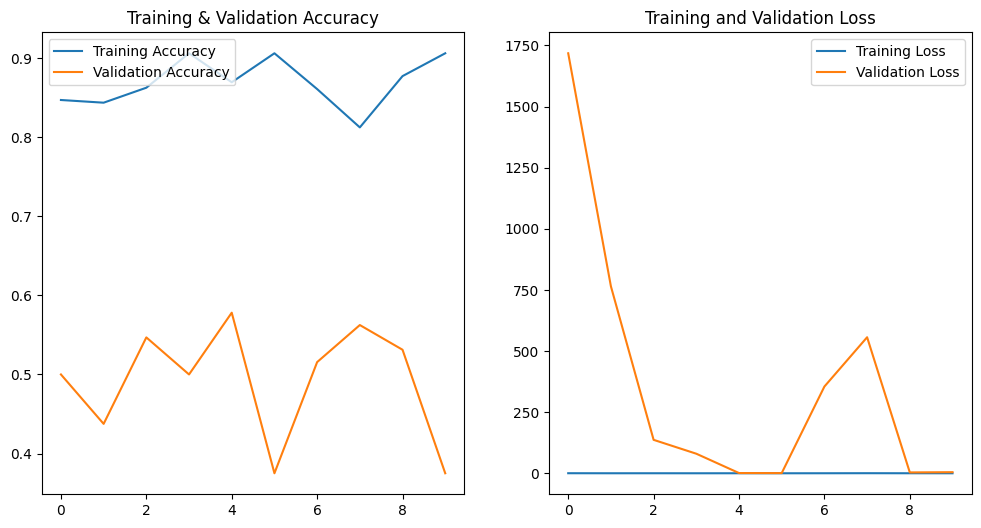

In [97]:
def plot_training_history(history):
  acc = history.history['accuracy']
  loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  epochs_range = range(len(acc))

  plt.figure(figsize=(12,6))
  plt.subplot(1,2,1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt .plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='upper left')
  plt.title('Training & Validation Accuracy')


  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


plot_training_history(history)

In [98]:
model.save('oral_disease_classifier.h5')
print('Model saved successfully')


Model saved successfully
